In [2]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import gudhi
import itertools

In [3]:
data = np.array([[1.1,0], [0.309,0.951], [-0.909,0.588], [-0.859, -0.588], [0.309,-0.951]])

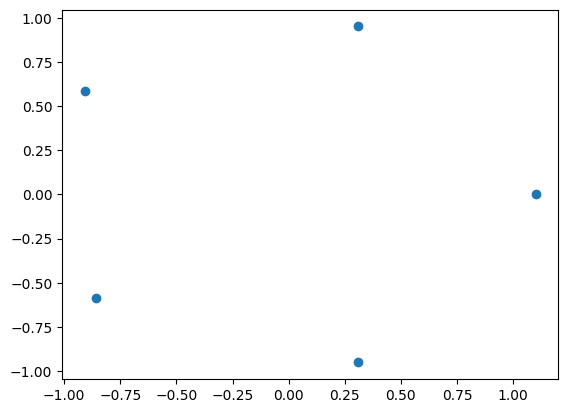

In [4]:
plt.scatter(data[:,0],data[:,1])

In [5]:
rips = gudhi.RipsComplex(points=data)

In [6]:
simplex_tree = rips.create_simplex_tree(2)

In [7]:
persistence = simplex_tree.persistence()

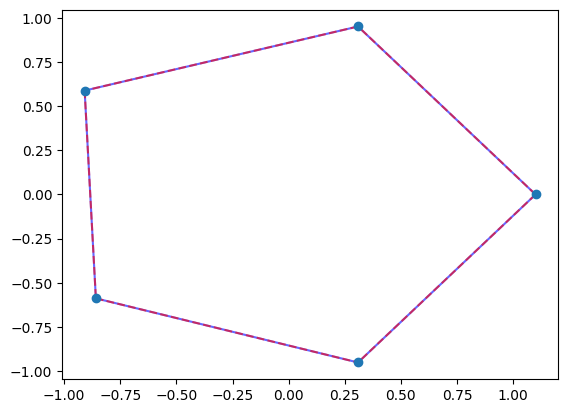

In [8]:

alpha_complex = {tuple(sorted(simplex)) : radius for simplex, radius in simplex_tree.get_filtration()}
boundary_matrix = {simplex : set(itertools.combinations(simplex, len(simplex)-1))-{tuple()} for simplex in alpha_complex}

R = { k : v for k,v in boundary_matrix.items()}
V = { k : {k} for k in boundary_matrix}
lowinv = {} # lowinv[i]=index of column with the lowest 1 at i
order_function = lambda s: (alpha_complex[s], s)
for s in sorted(R, key=order_function):
    t = lowinv.get(max(R[s], key=order_function),-1) if len(R[s])!=0 else -1
    while t!=-1:
        R[s] = R[t]^R[s] # symmetric difference of t-th and s-th columns
        V[s] = V[t]^V[s]
        t = lowinv.get(max(R[s], key=order_function),-1) if len(R[s])!=0 else -1
    if len(R[s])!=0:
        lowinv[max(R[s], key=order_function)] = s

loops = [bar for bar in lowinv.items() if len(bar[0])==2]
longest_loop = max(loops, key=lambda bar: alpha_complex[bar[1]]-alpha_complex[bar[0]])
representative_1 = R[longest_loop[1]]
representative_2 = V[longest_loop[0]]

for edge in representative_1:
    plt.plot( *zip(data[edge[0]], data[edge[1]]), '-', color='blue', alpha=.6 )
for edge in representative_2:
    plt.plot( *zip(data[edge[0]], data[edge[1]]), '--', color='red', alpha=.6 )
plt.plot(*zip(*data),'o')
plt.show()

In [9]:
print(representative_1)
print(representative_2)

{(0, 1), (1, 2), (0, 4), (3, 4), (2, 3)}
{(0, 1), (1, 2), (0, 4), (3, 4), (2, 3)}


In [10]:
[sim for sim in simplex_tree.get_filtration()]

[([0], 0.0),
 ([1], 0.0),
 ([2], 0.0),
 ([3], 0.0),
 ([4], 0.0),
 ([2, 3], 1.1770624452423923),
 ([3, 4], 1.2231079265543168),
 ([0, 1], 1.2369648337766115),
 ([0, 4], 1.2369648337766115),
 ([1, 2], 1.270941776793886),
 ([1, 4], 1.902),
 ([0, 1, 4], 1.902),
 ([1, 3], 1.9320313144460157),
 ([1, 2, 3], 1.9320313144460157),
 ([1, 3, 4], 1.9320313144460157),
 ([2, 4], 1.9626627321065633),
 ([1, 2, 4], 1.9626627321065633),
 ([2, 3, 4], 1.9626627321065633),
 ([0, 3], 2.045342269645841),
 ([0, 1, 3], 2.045342269645841),
 ([0, 3, 4], 2.045342269645841),
 ([0, 2], 2.0932809176027956),
 ([0, 1, 2], 2.0932809176027956),
 ([0, 2, 3], 2.0932809176027956),
 ([0, 2, 4], 2.0932809176027956)]

In [11]:
simplex_tree.persistence_pairs()

[([3], [3, 2]),
 ([4], [4, 3]),
 ([1], [1, 0]),
 ([2], [4, 0]),
 ([2, 1], [4, 3, 1]),
 ([0], [])]

/home/crystal/miniconda3/envs/openmm/lib/python3.10/site-packages/gudhi/persistence_graphical_tools.py:105: UserWarning: This function is not available.
ModuleNotFoundError: No module named 'matplotlib'.
  warnings.warn(f"This function is not available.\nModuleNotFoundError: No module named '{import_error.name}'.")


<Axes: title={'center': 'Persistence diagram'}, xlabel='Birth', ylabel='Death'>

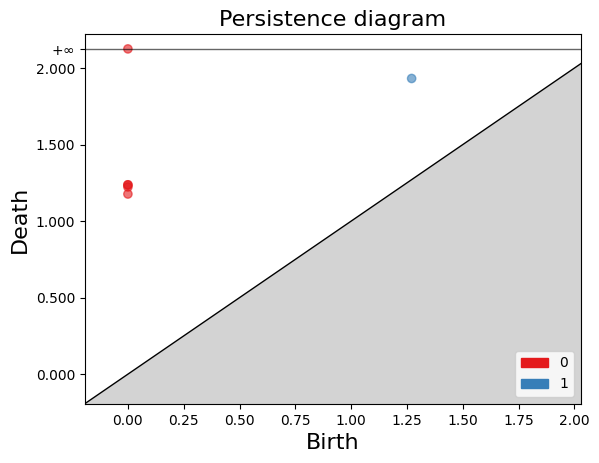

In [15]:
gudhi.plot_persistence_diagram(persistence)

In [21]:
n = 100 #number of random points to generate
points = [(random.random(), random.random()) for _ in range(n)]
gudhi_complex = gudhi.AlphaComplex(points).create_simplex_tree()
alpha_complex = {tuple(sorted(simplex)) : radius for simplex, radius in gudhi_complex.get_filtration()}
boundary_matrix = {simplex : set(itertools.combinations(simplex, len(simplex)-1))-{tuple()} for simplex in alpha_complex}


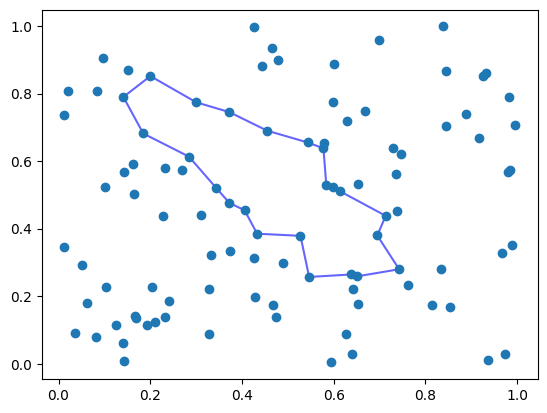

In [24]:
import gudhi
import random
import itertools
from matplotlib import pyplot as plt


R = { k : v for k,v in boundary_matrix.items()}
V = { k : {k} for k in boundary_matrix}
lowinv = {} # lowinv[i]=index of column with the lowest 1 at i
order_function = lambda s: (alpha_complex[s], s)
for s in sorted(R, key=order_function):
    t = lowinv.get(max(R[s], key=order_function),-1) if len(R[s])!=0 else -1
    while t!=-1:
        R[s] = R[t]^R[s] # symmetric difference of t-th and s-th columns
        V[s] = V[t]^V[s]
        t = lowinv.get(max(R[s], key=order_function),-1) if len(R[s])!=0 else -1
    if len(R[s])!=0:
        lowinv[max(R[s], key=order_function)] = s

loops = [bar for bar in lowinv.items() if len(bar[0])==2]
longest_loop = max(loops, key=lambda bar: alpha_complex[bar[1]]-alpha_complex[bar[0]])
representative_1 = R[longest_loop[1]]
representative_2 = V[longest_loop[0]]

for edge in representative_1:
    plt.plot( *zip(points[edge[0]], points[edge[1]]), '-', color='blue', alpha=.6 )
'''
for edge in representative_2:
    plt.plot( *zip(points[edge[0]], points[edge[1]]), '--', color='red', alpha=.6 )
'''
plt.plot(*zip(*points),'o')
plt.show()